In [111]:
import sys
import pathlib
import numpy as np
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import warnings

warnings.filterwarnings("ignore")
sys.path.insert(0, "../utils/")
from data_loader import load_data, load_train_test_data

In [112]:
# data path
data_directory = "../0.data-download/data/"

In [113]:
# load the training data
train_data = load_train_test_data(
    data_directory, train_or_test="train", load_gene_stats=False
)

In [114]:
# set a unique dataframe that can be appended from
training_df_age = train_data

# group by age and create new dataframes that can be appended to
groups = training_df_age.groupby("age_and_sex")
adult_effect_df = pd.DataFrame()
ped_effect_df = pd.DataFrame()
for name, training_df_age in groups:

    # append rows that contain Adult samples (male or female) to the new adult effect dataframe
    if name == "Adult_Male" or name == "Adult_Female" or name == "Adult_nan":
        adult_effect_df = adult_effect_df._append(training_df_age)
        adult_effect_df = adult_effect_df.reset_index(drop=True)

    # append rows that contain Pediatric samples (male ore female) to the new pediatric dataframe
    else:
        ped_effect_df = ped_effect_df._append(training_df_age)
        ped_effect_df = ped_effect_df.reset_index(drop=True)

In [115]:
# set a unique dataframe that can be appended from
training_df_sex = train_data

# group by sex and create new dataframes to be appended to
groups_sex = training_df_sex.groupby("age_and_sex")
male_effect_df = pd.DataFrame()
female_effect_df = pd.DataFrame()
for name, training_df_sex in groups_sex:

    # append rows that contain Male samples (Adult or Pediatric) to the new male effect dataframe and filter out samples that contain no gender info
    if (
        name == "Adult_Male"
        or name == "Pediatric_Male"
        and name != "Pediatric_nan"
        and name != "Adult_nan"
    ):
        male_effect_df = male_effect_df._append(training_df_sex)
        male_effect_df = male_effect_df.reset_index(drop=True)

    # append rows that contain Female samples (Adult or Pediatric) to the new female effect dataframe and filter out samples that contain no gender info
    elif (
        name == "Adult_Female"
        or name == "Pediatric_Female"
        and name != "Pediatric_nan"
        and name != "Adult_nan"
    ):
        female_effect_df = female_effect_df._append(training_df_sex)
        female_effect_df = female_effect_df.reset_index(drop=True)

In [116]:
print(adult_effect_df.shape)
adult_effect_df.head(3)

(569, 17109)


,ModelID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-001400,-0.146219,-0.308460,0.200643,0.303539,0.124659,0.156108,-0.001530,-0.099823,0.155396,...,-0.721724,-0.049671,-0.128862,0.065914,-0.187874,-0.182065,-0.042625,-0.124154,-0.413520,Adult_Female
1,ACH-001607,0.014314,-0.042777,0.029665,0.071068,-0.180888,-0.138579,0.019597,-0.186129,-0.079807,...,-0.322235,0.004403,0.142555,-0.063794,-0.033171,-0.112337,-0.095850,-0.207122,-0.148309,Adult_Female
2,ACH-002003,-0.022386,0.050579,-0.037017,0.156323,0.074915,-0.029547,0.007442,0.259561,-0.067846,...,-0.439568,0.204642,0.108627,-0.051685,-0.082874,0.085040,-0.163200,-0.011478,-0.151259,Adult_Female


In [117]:
print(ped_effect_df.shape)
ped_effect_df.head(3)

(101, 17109)


,ModelID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-000884,-0.081498,-0.171470,-0.090280,0.103028,0.012566,-0.211951,0.023782,-0.060868,0.006372,...,-0.782037,0.105815,-0.065808,-0.000630,0.115507,-0.044015,-0.098097,-0.090774,-0.278785,Adult_Unknown
1,ACH-001212,-0.165505,-0.107355,0.264424,0.200538,-0.129385,-0.015351,0.128600,-0.293800,-0.063891,...,-0.239258,-0.007196,-0.034968,0.102970,-0.034861,-0.268647,-0.060592,-0.622535,-0.368041,Pediatric_Female
2,ACH-000260,-0.019484,-0.078167,-0.041717,0.046208,-0.229482,-0.177081,0.000570,-0.066302,0.008426,...,-0.564366,0.082260,0.009843,-0.151433,-0.058123,-0.180082,-0.032600,-0.005677,-0.329996,Pediatric_Female


In [118]:
print(male_effect_df.shape)
male_effect_df.head(3)

(378, 17109)


,ModelID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-000015,-0.153272,-0.039229,-0.064208,0.079199,-0.068063,-0.029462,0.057602,-0.066563,0.021617,...,-0.183974,0.026359,0.059910,0.025818,0.009335,-0.139613,-0.159035,-0.147467,-0.224625,Adult_Male
1,ACH-001961,-0.069971,-0.068830,0.032941,0.064824,-0.091528,-0.066410,-0.008933,-0.048042,-0.171945,...,-0.547815,0.006207,0.163901,-0.126165,-0.041571,-0.081284,-0.070786,-0.061181,-0.298216,Adult_Male
2,ACH-000323,-0.037558,-0.081492,0.027827,0.150471,-0.109521,-0.031712,-0.060373,0.010003,-0.078692,...,-0.586437,0.053731,0.038540,0.005077,-0.140627,-0.347625,-0.208673,-0.238439,-0.123442,Adult_Male


In [119]:
print(female_effect_df.shape)
female_effect_df.head(3)

(285, 17109)


,ModelID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-001400,-0.146219,-0.308460,0.200643,0.303539,0.124659,0.156108,-0.001530,-0.099823,0.155396,...,-0.721724,-0.049671,-0.128862,0.065914,-0.187874,-0.182065,-0.042625,-0.124154,-0.413520,Adult_Female
1,ACH-001607,0.014314,-0.042777,0.029665,0.071068,-0.180888,-0.138579,0.019597,-0.186129,-0.079807,...,-0.322235,0.004403,0.142555,-0.063794,-0.033171,-0.112337,-0.095850,-0.207122,-0.148309,Adult_Female
2,ACH-002003,-0.022386,0.050579,-0.037017,0.156323,0.074915,-0.029547,0.007442,0.259561,-0.067846,...,-0.439568,0.204642,0.108627,-0.051685,-0.082874,0.085040,-0.163200,-0.011478,-0.151259,Adult_Female


In [120]:
# drop the string values from all dataframes
adult_effect_df_float = adult_effect_df.drop(
    columns=["ModelID", "age_and_sex"]
)
ped_effect_df_float = ped_effect_df.drop(columns=["ModelID", "age_and_sex"])

male_effect_df_float = male_effect_df.drop(columns=["ModelID", "age_and_sex"])
female_effect_df_float = female_effect_df.drop(
    columns=["ModelID", "age_and_sex"]
)

effect_df = train_data.drop(columns="age_and_sex")
effect_df = effect_df.set_index("ModelID")

In [121]:
# t_test comparing gene dependencies in adult vs pediatric samples
t_test = ttest_ind(adult_effect_df_float, ped_effect_df_float)
t_test = pd.DataFrame(t_test).T
t_test.columns = ["t_stat", "p_value"]
print(t_test.shape)
t_test.head(3)

(17107, 2)


,t_stat,p_value
0,2.641547,0.008446
1,-1.369684,0.171246
2,-0.141305,0.887672


In [122]:
# t_test comparing gene dependencies in male vs female samples
t_test_sex = ttest_ind(male_effect_df_float, female_effect_df_float)
t_test_sex = pd.DataFrame(t_test_sex).T
t_test_sex.columns = ["t_stat", "p_value"]
print(t_test_sex.shape)
t_test_sex.head(3)

(17107, 2)


,t_stat,p_value
0,-0.704334,0.481473
1,1.143283,0.253335
2,1.189012,0.234862


In [123]:
print(effect_df.shape)
effect_df.head(3)

(670, 17107)


,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ModelID,,,,,,,,,,,,,,,,,,,,,
ACH-001054,-0.148523,0.066810,0.078134,0.168272,-0.183760,0.045006,0.076497,-0.019024,-0.123016,-0.026528,...,-0.526902,-0.461615,0.050362,0.048965,0.149117,-0.006584,-0.307776,-0.069039,-0.049377,-0.375725
ACH-000015,-0.153272,-0.039229,-0.064208,0.079199,-0.068063,-0.029462,0.057602,-0.066563,0.021617,0.071968,...,-0.377984,-0.183974,0.026359,0.059910,0.025818,0.009335,-0.139613,-0.159035,-0.147467,-0.224625
ACH-001961,-0.069971,-0.068830,0.032941,0.064824,-0.091528,-0.066410,-0.008933,-0.048042,-0.171945,0.112513,...,-0.250267,-0.547815,0.006207,0.163901,-0.126165,-0.041571,-0.081284,-0.070786,-0.061181,-0.298216


In [124]:
# calculate variance of each gene then send the results plus the gene info into a new dataframe
variance = effect_df.var()
variance_list = variance.tolist()
column_names = ["variance"]
variance_df = pd.DataFrame(variance, columns=column_names)
variance_df = variance_df.sort_index(ascending=True).reset_index()
variance_df = variance_df.rename(columns={"index": "gene_ID"})
print(variance_df.shape)
variance_df.head(3)

(17107, 2)


,gene_ID,variance
0,A1BG (1),0.009987
1,A1CF (29974),0.012222
2,A2M (2),0.010248


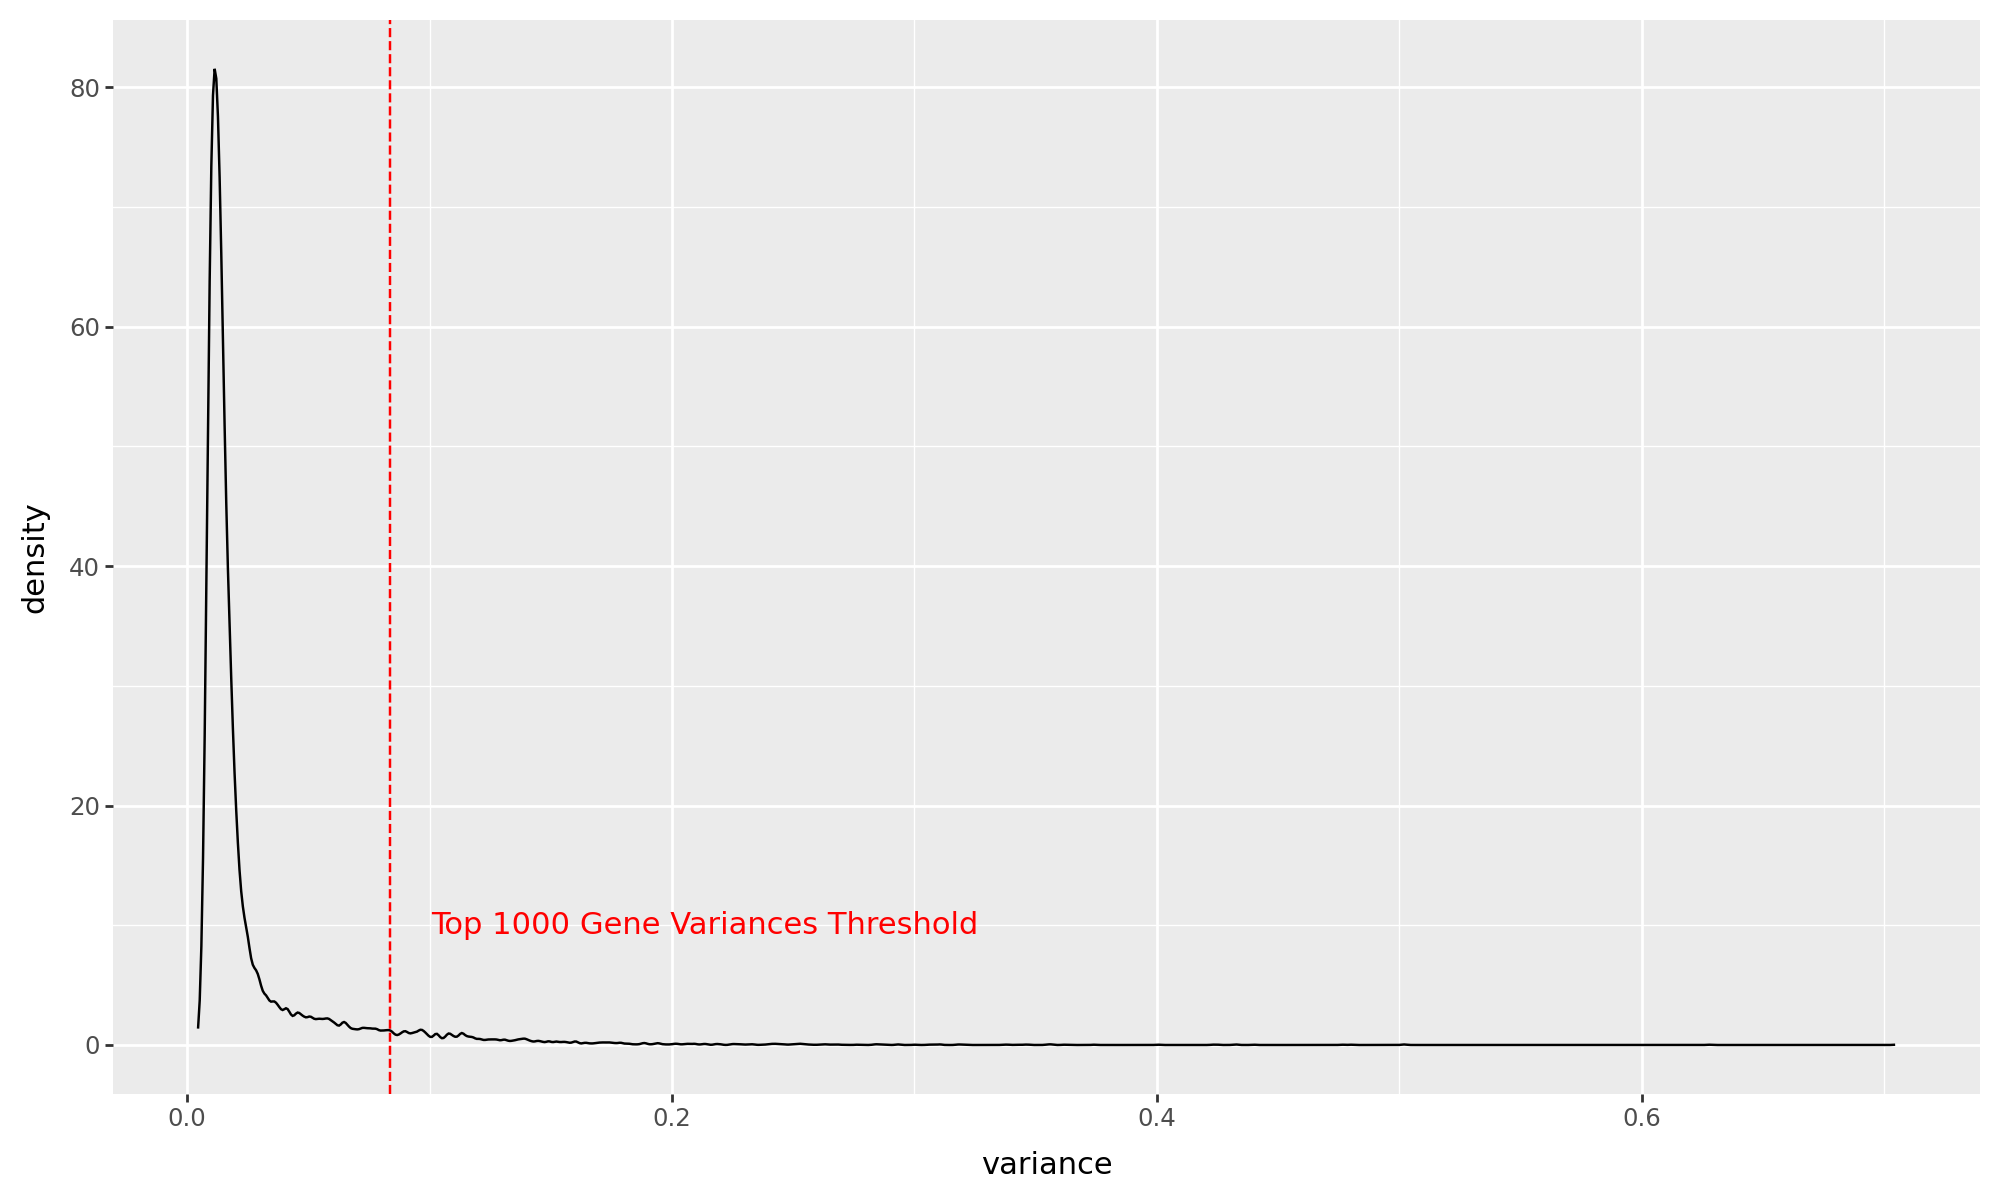

In [125]:
# finding the smallest gene variation out of the 1000 largest gene variations to set the top 1000 gene variances threshold
n = variance_df["variance"].nlargest(1000)
variance_threshold = n.astype(float).min()

# plotting variance density chart and marking the 1000 largest gene variation cutoff
variance_density_plot = (
    p9.ggplot(variance_df, p9.aes(x="variance"))
    + p9.geom_density()
    + p9.geom_vline(xintercept=variance_threshold, linetype="dashed", color="red")
    + p9.annotate(geom="text", x=variance_threshold + 0.13, y = 10, label="Top 1000 Gene Variances Threshold", color="red") 
    + p9.theme(figure_size=(10, 6))
)

# save the figure
density_path = pathlib.Path("./figures/variance_density_plot.png")
variance_density_plot.save(density_path)
variance_density_plot

In [126]:
# first create new dataframe containing gene info as well as both adult-pediatric and male-female t-test results and variance results
df = variance_df.assign(
    ttest_A_vs_P=t_test.t_stat.astype(float),
    ttest_M_vs_F=t_test_sex.t_stat.astype(float),
)

# and save the new dataframe as a .csv
testing_df_output = pathlib.Path(
    "../0.data-download/data/genes_variances_and_t-tests_df.csv"
)
df.to_csv(testing_df_output, index=False)
print(df.shape)
df.head(3)

(17107, 4)


,gene_ID,variance,ttest_A_vs_P,ttest_M_vs_F
0,A1BG (1),0.009987,2.641547,-0.704334
1,A1CF (29974),0.012222,-1.369684,1.143283
2,A2M (2),0.010248,-0.141305,1.189012


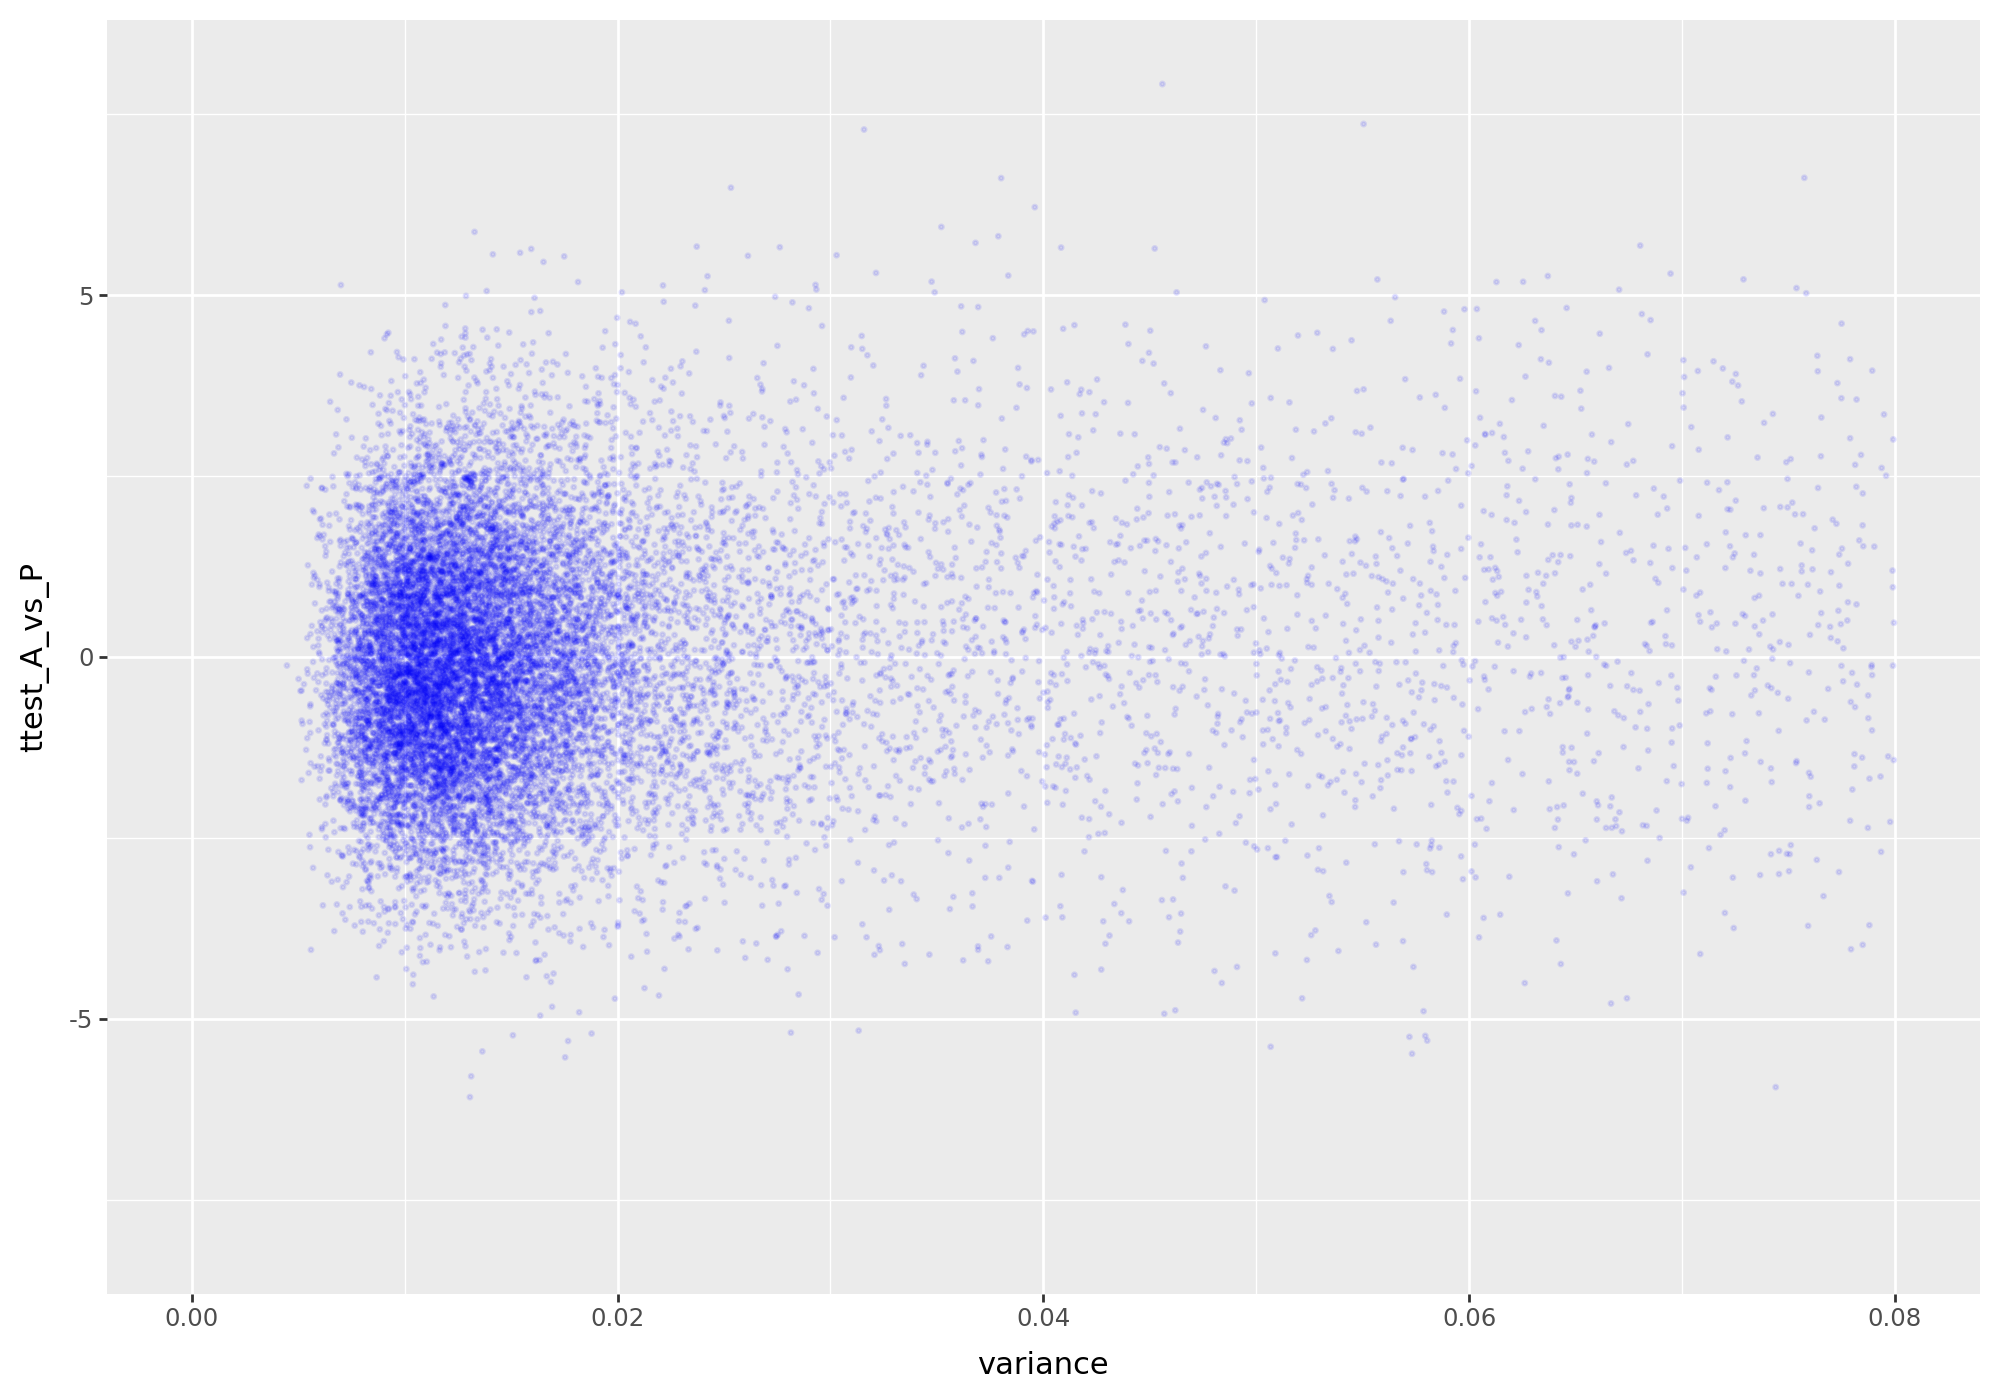

In [127]:
# plot adult-pediatric ttest versus variance
A_vs_P_by_variance_plot = (
    p9.ggplot(data=df, mapping=p9.aes(x="variance", y="ttest_A_vs_P"))
    + p9.geom_point(size=0.4, alpha=0.1, color="blue")
    + p9.theme(figure_size=(10, 7))
    + p9.xlim(0.00, 0.08)
    + p9.ylim(-8,8)
)

# save the figure
adult_vs_pediatric_path = pathlib.Path(
    "./figures/adult-pediatric_ttest_vs_variance.png"
)
A_vs_P_by_variance_plot.save(adult_vs_pediatric_path)
A_vs_P_by_variance_plot

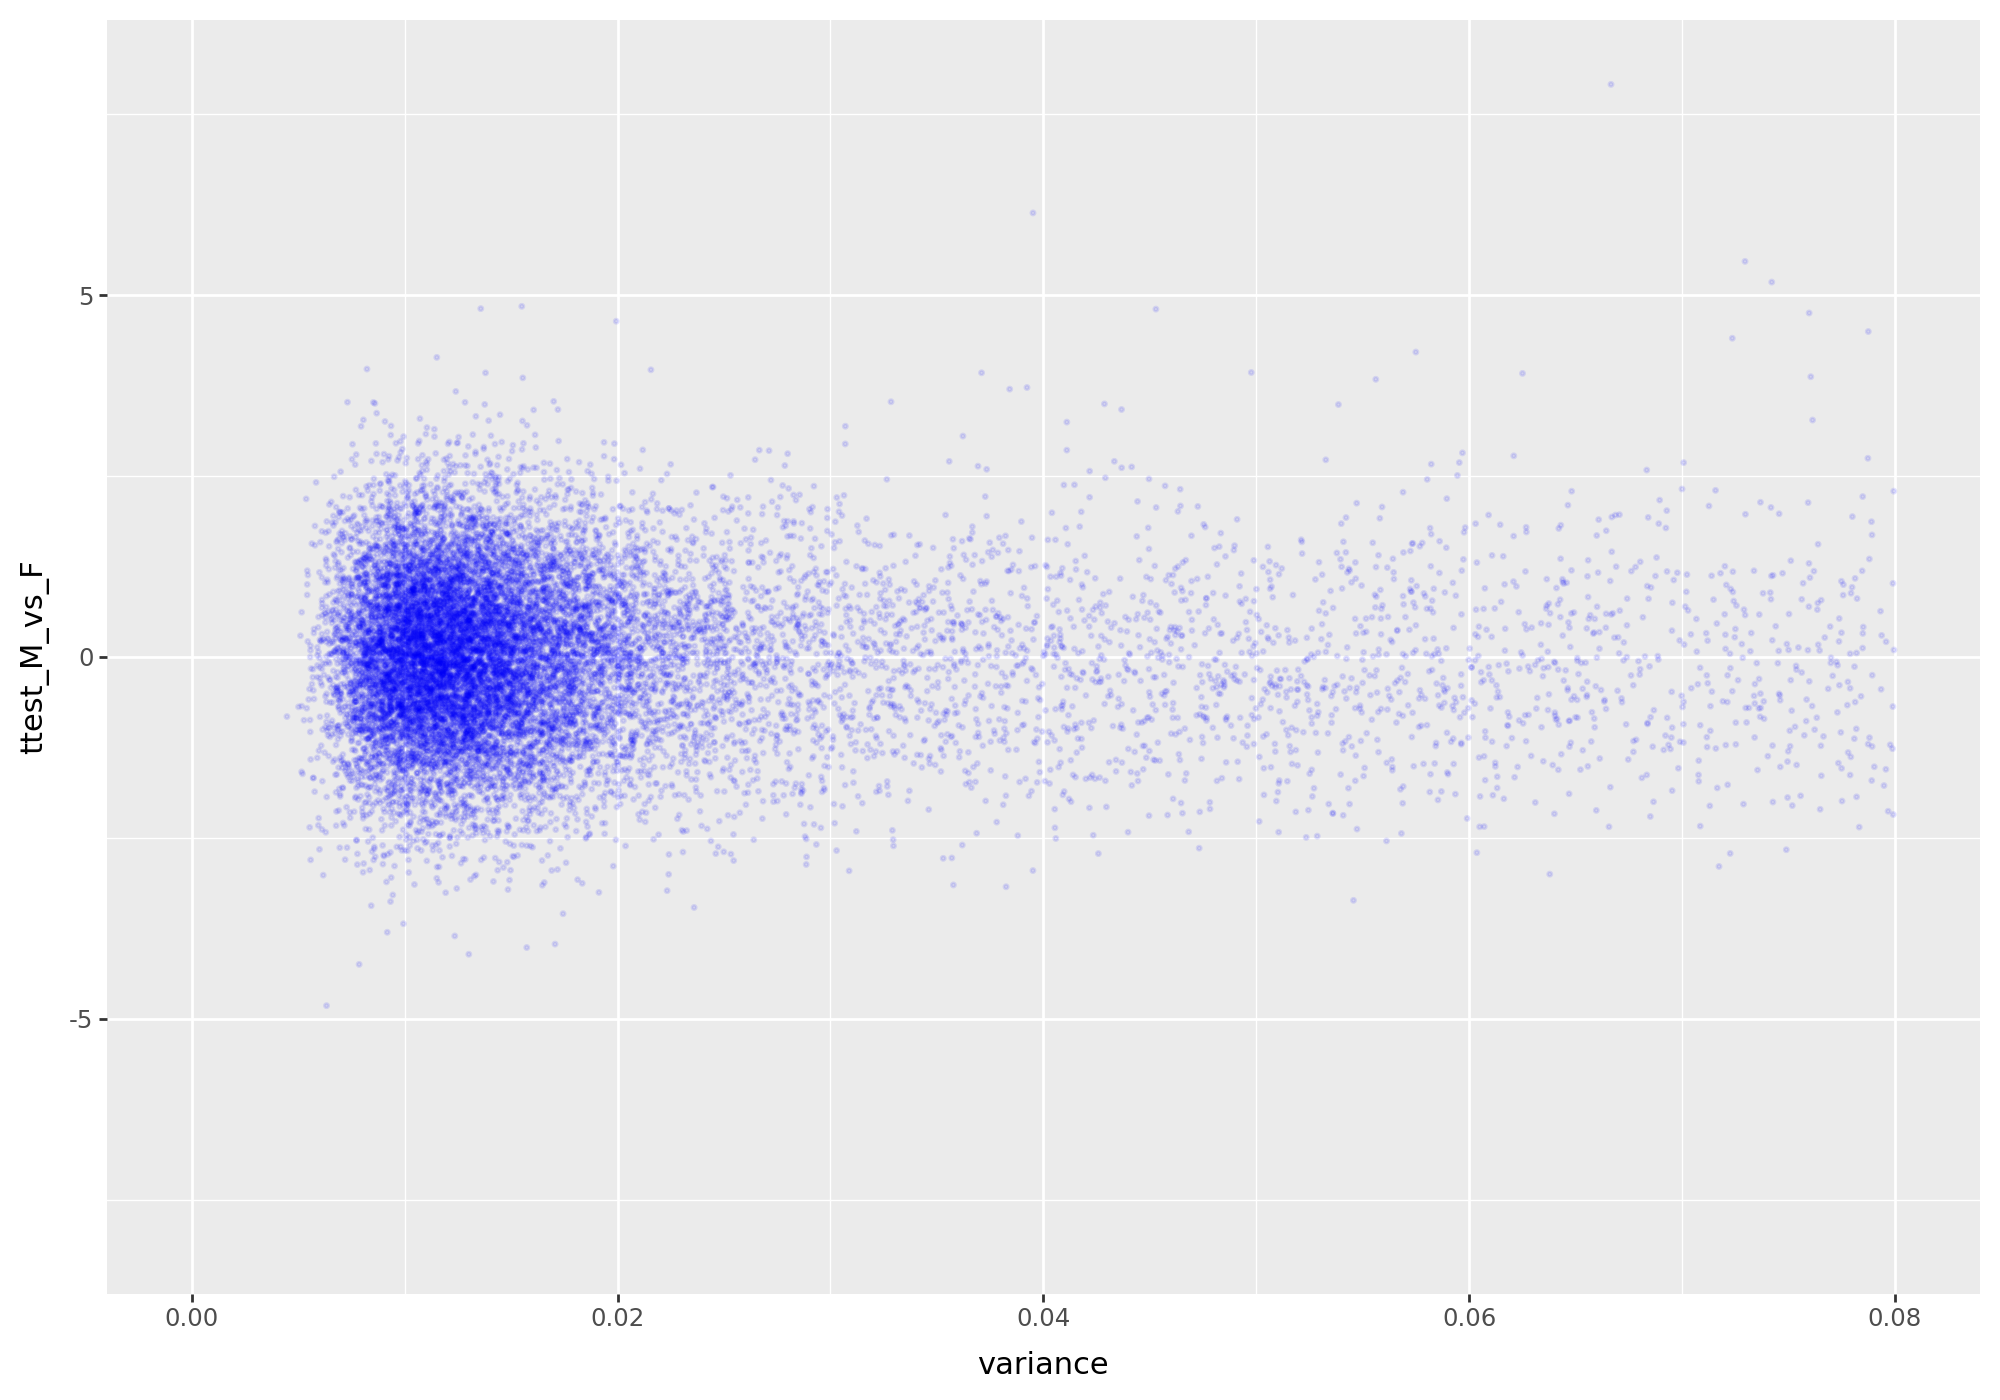

In [128]:
# plot male-female ttest versus gene variance
M_vs_F_by_variance_plot = (
    p9.ggplot(data=df, mapping=p9.aes(x="variance", y="ttest_M_vs_F"))
    + p9.geom_point(size=0.4, alpha=0.1, color="blue")
    + p9.theme(figure_size=(10, 7))
    + p9.xlim(0.00, 0.08)
    + p9.ylim(-8,8)
)

# save the figure
male_vs_female_path = pathlib.Path("./figures/male-female_ttest_vs_variance.png")
M_vs_F_by_variance_plot.save(male_vs_female_path)
M_vs_F_by_variance_plot